# Text - Summarization using abstractive summarization

###     we are going to use lstm encode-decode model for this. Abstractive methods select words based on semantic understanding, even those words did not appear in the source documents. It aims at producing important material in a new way. They interpret and examine the text using advanced natural language techniques in order to generate a new shorter text that conveys the most critical information from the original text.


### It can be correlated to the way human reads a text article or blog post and then summarizes in their own word.
Input document → understand context → semantics → create own summary.

## Problem statement :

 generate a summary for long food reviews.

## Dataset  : https://www.kaggle.com/snap/amazon-fine-food-reviews

In [3]:
import pandas as pd 
data = pd.read_csv("../Reviews.csv" , nrows=100000)

drops NA and duplicates

In [4]:
data.drop_duplicates(subset=['Text'] , inplace=True)
data.dropna(axis=0 , inplace = True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88421 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      88421 non-null  int64 
 1   ProductId               88421 non-null  object
 2   UserId                  88421 non-null  object
 3   ProfileName             88421 non-null  object
 4   HelpfulnessNumerator    88421 non-null  int64 
 5   HelpfulnessDenominator  88421 non-null  int64 
 6   Score                   88421 non-null  int64 
 7   Time                    88421 non-null  int64 
 8   Summary                 88421 non-null  object
 9   Text                    88421 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.4+ MB


In [6]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
99995,99996,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when I...
99996,99997,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating sy...
99997,99998,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It ...
99998,99999,B000LQORDE,A9Q950IPXJR1D,"Lynda ""casual customer""",2,5,4,1237161600,Spicy!!,"I do like these noodles although, to say they ..."


### we drop unwanted symbol , charectors from dataset that do not affect the objective of our problem.

In [7]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",                                   "could've": "could have", "couldn't": "could not",
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had                                   not", "hasn't": "has not", "haven't": "have not",
                        "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",                                     "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                         "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I                                    will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                         "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm":                                    "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

We will perform the below preprocessing tasks for our data:

1.Convert everything to lowercase

2.Remove HTML tags

3.Contraction mapping

4.Remove (‘s)

5.Remove any text inside the parenthesis ( )

6.Eliminate punctuations and special characters

7.Remove stopwords


8.Remove short words

In [8]:
from nltk.corpus import stopwords 


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [9]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
print(stopWords)


{"you'd", 'whom', 'll', 'd', 'being', 'the', 'will', 'between', 'so', 'any', 'no', 'over', 'doesn', 'don', "mightn't", 'm', 're', 'my', 'is', 'by', 'into', 'on', 'shouldn', 'until', "should've", 'it', 'all', 'most', 'isn', 'weren', 'from', 'such', 'just', 'aren', 'his', 'has', 'wasn', 'too', "wasn't", 'its', 'o', 'both', 've', 'under', 'our', 'same', 'again', 'out', 'been', 'they', 'yourselves', "needn't", 'having', 'yours', 'him', 'who', 'ours', 'itself', 'here', 'does', 'further', 'should', 'now', "didn't", 'for', 'are', "shan't", 'i', 'while', "isn't", 'each', 'because', 'how', "you're", 'your', 'as', 'only', 'why', 'other', 'above', 'up', 'themselves', 'myself', 'did', 's', "weren't", "that'll", 'these', 'had', 'not', "aren't", 'own', "you'll", "she's", 'if', 'of', 'down', 'more', 'ain', 'theirs', 'at', 'this', 'shan', 'doing', 'during', 'after', 'that', 'y', 'which', 'their', 'against', 'hadn', 'me', "you've", "it's", 'with', 'where', 'few', 'couldn', 'hasn', 'we', 'once', 'and', 

In [10]:
# for web-scrapping - removing HTML & XML
from bs4 import BeautifulSoup
import re


In [11]:
def text_cleaner(text , num):
    new_text = text.lower()
    new_text = BeautifulSoup(new_text, "lxml").text
    new_text = re.sub(r'\([^)]*\)', '', new_text)
    new_text = re.sub('"','', new_text)
    new_text = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in new_text.split(" ")])    
    new_text = re.sub(r"'s","",new_text)
    new_text = re.sub("[^a-zA-Z]", " ", new_text) 
    new_text = re.sub('[m]{2,}', 'mm', new_text)
    if(num==0):
        tokens = [w for w in new_text.split() if not w in stopWords]
    else:
        tokens=new_text.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                 #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()


### call the function

In [12]:
cleaned_data = []
for t in data['Text']:
    cleaned_data.append(text_cleaner(t , 0))
    

### print text data

In [13]:
cleaned_data[ :5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

### now clean-up summary data

In [14]:
clean_summary = []
for s in data['Summary']:
    clean_summary.append(text_cleaner(s ,1))
print(clean_summary[:5])

C:\Users\kevin\anaconda3\lib\site-packages\bs4\__init__.py:329: MarkupResemblesLocatorWarning: "..." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\kevin\anaconda3\lib\site-packages\bs4\__init__.py:414: MarkupResemblesLocatorWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


### adding the clean text and clean summary in data table


In [15]:
data['clean_text'] = cleaned_data
data['clean_summary'] = clean_summary


In [16]:
import numpy as np
data.replace('', np.NaN, inplace=True)
data.dropna(axis=0,inplace=True)

data.count()

Id                        88351
ProductId                 88351
UserId                    88351
ProfileName               88351
HelpfulnessNumerator      88351
HelpfulnessDenominator    88351
Score                     88351
Time                      88351
Summary                   88351
Text                      88351
clean_text                88351
clean_summary             88351
dtype: int64

## Understanding the distribution of the sequences

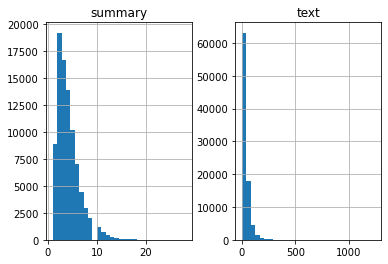

In [17]:
import matplotlib.pyplot as plt 
text_word_count =[]
summary_word_count = []

for i in data['clean_text']:
    text_word_count.append(len(i.split()))

for j in data['clean_summary']:
    summary_word_count.append(len(j.split()))


#representing data in graph
length_df = pd.DataFrame({'text' : text_word_count , 'summary' : summary_word_count})
length_df.hist(bins = 30)
plt.show()

### Let us understand the proportion of the length of summaries below 8

In [18]:
cnt = 0
for i in data['clean_summary']:
    if(len(i.split())  < 9):
        cnt = cnt +1
print("The percentage of summaries with lenght less than 9 is ::" ,  cnt / len(data['clean_summary']))

The percentage of summaries with lenght less than 9 is :: 0.9425020656246109


### let's check for text data for 30 lenght 

In [19]:
te_cnt = 0
for i in data['clean_text']:
    if(len(i.split()) <= 40):
        te_cnt =te_cnt +1
print("the percentage of the data with length less or equal 30 is ::: " , te_cnt/len(data['clean_text']))

the percentage of the data with length less or equal 30 is :::  0.682493689941257


### we got that data with max lenght is about 50 % and with max length 40 is about 68 %. But here we have smaller machine for training so we choose max text length 30 data. because with lots of data the neural netwoo some time overfit so it will decrease accuracy


### so we decide that our system will give summary of atleast 9 words
### as well as we decide to take max length of text is 30

In [20]:
max_text_length = 30
max_summary_length = 8

### so here we separate the data which text has max_lenght is 30 and summary have less then 9 lenght

## Data-set Creation

In [21]:
clean_text = np.array(data['clean_text'])
clean_summary = np.array(data['clean_summary']) 


short_text = []
short_summary = []

for i in range(len(clean_text)):
    if(len(clean_text[i].split()) <= max_text_length and len(clean_summary[i].split()) <= max_summary_length):
        short_text.append(clean_text[i])
        short_summary.append(clean_summary[i])

df = pd.DataFrame({'text' : short_text , 'summary' : short_summary})

In [22]:
df

,text,summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not as advertised
2,looking secret ingredient robitussin believe f...,cough medicine
3,great taffy great price wide assortment yummy ...,great taffy
4,saltwater taffy great flavors soft chewy candy...,great just as good as the expensive brands
...,...,...
47165,stuff awesome best flavor boil water drain wat...,great stuff
47166,love noodle little spicy wife perfct,good stuff
47167,love buy another box done last one,yummy
47168,favorite brand korean ramen spicy used eating ...,great ramen


### now we are inserting spacial tokan at the "starting"  and  "ending" of the summary.
### here we choose 'sostok' as start tokan & 'eostok' for end tokan.

In [23]:
df['summary'] = df['summary'].apply(lambda x :'sostok ' + x + ' eostok')
df

,text,summary
0,bought several vitality canned dog food produc...,sostok good quality dog food eostok
1,product arrived labeled jumbo salted peanuts p...,sostok not as advertised eostok
2,looking secret ingredient robitussin believe f...,sostok cough medicine eostok
3,great taffy great price wide assortment yummy ...,sostok great taffy eostok
4,saltwater taffy great flavors soft chewy candy...,sostok great just as good as the expensive bra...
...,...,...
47165,stuff awesome best flavor boil water drain wat...,sostok great stuff eostok
47166,love noodle little spicy wife perfct,sostok good stuff eostok
47167,love buy another box done last one,sostok yummy eostok
47168,favorite brand korean ramen spicy used eating ...,sostok great ramen eostok


### deviding dataset into text and train set

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

x_tr , x_val , y_tr , y_val = train_test_split( np.array(df['text']) , np.array(df['summary']) ,test_size = 0.1 , random_state = 0 , shuffle = True)
print(len(x_tr) , len(x_val) , len(y_tr) , len(y_val) )

42453 4717 42453 4717


## Convert words data in numarical form (preparing TOKENIZER)

## Text Summarizer

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences



In [26]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))
print(len(x_tokenizer.word_counts.items()))


24934


## Rarewords and its Coverage
### Let us look at the proportion rare words and its total coverage in the entire text

### Here, I am defining the threshold to be 4 which means word whose count is below 4 is considered as a rare word

In [27]:
thresh=4

cnt=0 #gives me the no. of rare words whose count falls below threshold
tot_cnt=0 #gives the size of vocabulary (which means every unique words in the text)
freq=0
tot_freq=0
##tot_cnt --> cnt gives me the top most common words

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 66.14261650758002
Total Coverage of rare words: 2.956306874516583


### Let us define the tokenizer with top most common words for reviews.



In [28]:
#first we create tokeniser for reviews on the training dataset
x_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
x_tokenizer.fit_on_texts(list(x_tr))

#convert the string sequence into integer sequence
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

#padding 0 upto the max_seq_len in both dataset , so that we can pass it through neural network
x_tr = pad_sequences(x_tr_seq , maxlen=max_text_length , padding='post')
x_val = pad_sequences(x_val_seq , maxlen=max_text_length , padding= 'post')

#size of dictonary 
x_voc = x_tokenizer.num_words + 1

x_voc

8443

##############################################################################################################################

## Summary Tokenizer

In [29]:
#prepare the tokenizer for reviews of the data

y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

## Rarewords and its Coverage
### Let us look at the proportion rare words and its total coverage in the entire summary

### Here, I am defining the threshold to be 6 which means word whose count is below 6 is considered as a rare word

In [30]:
thresh = 6

cnt = 0
tot_cnt = 0
freq = 0
tot_freq = 0


for key , value in y_tokenizer.word_counts.items():
    tot_cnt = tot_cnt +1 
    tot_freq = tot_freq + value
    if(value < thresh):
        cnt = cnt +1 
        freq = freq+value



#printing the percentage of the rare words & coverage of the rare words
print("% of the rare words in vocabulary is " , (cnt/tot_cnt)*100)
print("total coverage of the rare words is " , (freq /tot_freq)*100)

% of the rare words in vocabulary is  78.12981298129813
total coverage of the rare words is  5.392639775441626


### Let us define the tokenizer with top most common words for summary.



In [31]:
#preparing the tokenizer for reviews on training dataset
y_tokenizer = Tokenizer(num_words= tot_cnt - cnt)
y_tokenizer.fit_on_texts(y_tr)

#convert data & summary text string into numbers sequence
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

#padding 0 upto max length
y_tr = pad_sequences(y_tr_seq , maxlen=max_summary_length , padding = "post")
y_val = pad_sequences(y_val_seq , maxlen = max_summary_length , padding= "post")

#size of the vocabulary 
y_voc  = y_tokenizer.num_words +1

y_voc

1989

In [32]:
# check length of that the count of the tokan "sostok" and len(y_tr) are equal

print(y_tokenizer.word_counts['sostok'] , len(y_tr))


42453 42453


### now we need to delete the rows containing only start and end tokens

In [33]:
# first deleting from training dataset
ind = []
for i in range(len(y_tr)):
    cnt = 0
    for j in y_tr[i]:
        if j != 0:
            cnt = cnt +1
    if(cnt == 2):
        ind.append(i)

y_tr = np.delete(y_tr , ind , axis=0)
x_tr = np.delete(x_tr , ind , axis = 0)
print(len(y_tr) , len(x_tr))

41346 41346


In [34]:
#now we are deleting from testing dataset (validation)

ind = []
for i in range(len(y_val)):
    cnt = 0
    for j in range(len(y_val[i])):
        if(j != 0):
            cnt = cnt +1
    if(cnt == 2):
        ind.append(i)


x_val = np.delete(x_val , ind , axis = 0)
y_val = np.delete(y_val , ind , axis = 0)
print(len(x_val) , len(y_val))


4717 4717


## Model Building
### We are finally at the model building part. But before we do that, we need to familiarize ourselves with a few terms which are required prior to building the model.

### Return Sequences = True: When the return sequences parameter is set to True, LSTM produces the hidden state and cell state for every timestep

Return State = True: When return state = True, LSTM produces the hidden state and cell state of the last timestep only

Initial State: This is used to initialize the internal states of the LSTM for the first timestep

Stacked LSTM: Stacked LSTM has multiple layers of LSTM stacked on top of each other. This leads to a better representation of the sequence. I encourage you to experiment with the multiple layers of the LSTM stacked on top of each other (it’s a great way to learn this)

## Here, we are building a 3 stacked LSTM for the encoder:




In [55]:

from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed , Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings

from attention import Attention
from keras import backend as k
k.clear_session()

In [59]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [61]:
latent_dim = 300
embedding_dim = 100

#encoder
encoder_inputs = Input(shape=(max_text_length))

#embedding layer
enc_emd = Embedding(x_voc , embedding_dim , trainable = True)(encoder_inputs)

#encode LSTM layer 1
encoder_lstm1= LSTM(latent_dim , return_sequences = True , return_state= True , dropout= 0.4 , recurrent_dropout = 0.4)
encoder_output1 , state_h1 ,state_c1 = encoder_lstm1(enc_emd)

#encode LSTM layer 2
encoder_lstm2 = LSTM(latent_dim , return_sequences=True, return_state=True , dropout = 0.4 , recurrent_dropout = 0.4)
encoder_output2 , state_h2 , state_c2 = encoder_lstm2(encoder_output1)

#encode LSTM layer 3
encoder_lstm3 = LSTM(latent_dim , return_sequences= True , return_state=True , dropout = 0.4 , recurrent_dropout = 0.4)
encoder_outputs , state_h , state_c = encoder_lstm3(encoder_output2)

#setup decoder , using encoder as intial state
decoder_inputs = Input(shape=(None , ))

#embedding layer
dec_emd_layer = Embedding( y_voc , embedding_dim , trainable = True)
dec_emb = dec_emd_layer(decoder_inputs)


decoder_lstm = LSTM(latent_dim , return_sequences =True , return_state = True , dropout = 0.4 , recurrent_dropout = 0.4 )
decoder_outputs , decoder_fwd_state , decoder_back_state  = decoder_lstm(dec_emb , initial_state = [state_h , state_c])

#attention layer
attn_layer = AttentionLayer(name = 'attention_layer')
attn_out , attn_state  = attn_layer([encoder_outputs , decoder_outputs])

#concat attention input and dence output LSTM 
decoder_concat_input = Concatenate(axis = 1 , name = 'concat_layer'  )([decoder_outputs , attn_out])

#dence layer
decoder_dence = TimeDistributed(Dense(y_voc , activation='softmax'))
decoder_outputs = decoder_dence(decoder_concat_input)

#define model
model = Model([encoder_inputs , decoder_inputs] , decoder_outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 30, 100)      844300      input_5[0][0]                    
__________________________________________________________________________________________________
lstm_8 (LSTM)                   [(None, 30, 300), (N 481200      embedding_4[0][0]                
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________